In [ ]:
# SVM (RBF)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
dataset = pd.read_csv('/content/MicmickedMeanSTDP3Authors.csv')

# Features & target variables
X = dataset.iloc[:, 1:39].values
y = dataset.iloc[:, 40].values

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define hyperparameters
svm_parameters = {
    'C': [10**i for i in range(-5, 5)],
    'gamma': [10**i for i in range(-5, 5)]
}

# Cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists
svm_accuracy_scores = []
svm_precision_scores = []
svm_recall_scores = []
svm_f1_scores = []

# Store confusion matrices
confusion_matrices = []

# Store the best model
best_svm_model = None
best_svm_score = 0.0

# Cross-validation
for train_index, test_index in outer_cv.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # SVM (RBF) Classifier
    svm_classifier = SVC(kernel='rbf', random_state=42)
    svm_grid_search = GridSearchCV(svm_classifier, svm_parameters, cv=inner_cv)
    svm_grid_search.fit(X_train_fold, y_train_fold)
    svm_best_params = svm_grid_search.best_params_
    svm_best_model = SVC(kernel='rbf', random_state=42, **svm_best_params)

    # Fit the best model
    svm_best_model.fit(X_train_fold, y_train_fold)

    # Prediction on the test fold
    svm_predictions = svm_best_model.predict(X_test_fold)
    current_score = accuracy_score(y_test_fold, svm_predictions)

    # Store the confusion matrix
    fold_conf_matrix = confusion_matrix(y_test_fold, svm_predictions)
    confusion_matrices.append(fold_conf_matrix)

    # Store best model (if the current score is higher)
    if current_score > best_svm_score:
        best_svm_score = current_score
        best_svm_model = svm_best_model

    # Performance metrics for current fold
    svm_accuracy_scores.append(accuracy_score(y_test_fold, svm_predictions))
    svm_precision_scores.append(precision_score(y_test_fold, svm_predictions))
    svm_recall_scores.append(recall_score(y_test_fold, svm_predictions))
    svm_f1_scores.append(f1_score(y_test_fold, svm_predictions))

# Save the best model
if best_svm_model is not None:
    joblib.dump(best_svm_model, 'best_svm_rbf_model.pkl')

# Test set
svm_average_accuracy_test = np.mean(svm_accuracy_scores)
svm_average_precision_test = np.mean(svm_precision_scores)
svm_average_recall_test = np.mean(svm_recall_scores)
svm_average_f1_test = np.mean(svm_f1_scores)

# Print results
print("\nSVM (RBF Kernel):")
print("Accuracy:", round(svm_average_accuracy_test, 4))
print("Precision:", round(svm_average_precision_test, 4))
print("Recall:", round(svm_average_recall_test, 4))
print("F1-score:", round(svm_average_f1_test, 4))


SVM with RBF Kernel Test Set:
Accuracy: 0.9875
Precision: 0.9875
Recall: 0.9875
F1-score: 0.9875



Overall Confusion Matrix:
[[79  1]
 [ 1 79]]


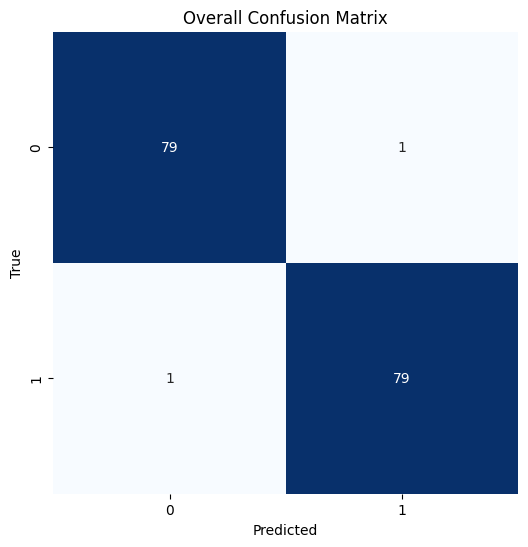

In [ ]:
# Combine confusion matrices by summing individual fold results
overall_conf_matrix = sum(confusion_matrices)

# Overall confusion matrix
print("\nOverall Confusion Matrix:")
print(overall_conf_matrix)

# Plot
plt.figure(figsize=(6,6))
sns.heatmap(overall_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
